# Сборный проект - 1

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
# Задачи исследования
# Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. 
# Шаг 2. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
# Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
# Шаг 4. Составьте портрет пользователя каждого региона
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?
# Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Шаг 6. Напишите общий вывод


# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint
import random
import seaborn as sns

from math import factorial
from scipy import stats as st
from scipy.stats import norm
from scipy.stats import ttest_ind

from pymystem3 import Mystem
from collections import Counter
from matplotlib.axes._axes import _log as matplotlib_axes_logger


In [2]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


ВЫВОД:

Необходимо поправить данные для будущего анализа : выяснить причины появления пропусков, изменить тип данных, привести данные к нижнему регистру и проверить наличие дубликатов.

# Шаг 2. Подготовьте данные
- Замена названий столбцов (привод к нижнему регистру);
- Преобразавание данных в нужные типы. 
- Обработка пропусков 
- Описание причин, которые могли привести к пропускам;
- Подсчет суммарных продаж во всех регионах и запись их в отдельный столбец.

In [5]:
games.columns = games.columns.str.lower() #приведем данные к нижнему регистру

In [6]:
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
games['year_of_release'].unique() #проверяем уникальные годы и обноружили пропуск

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [8]:
games.loc[:,'year_of_release'] = games.loc[:,'year_of_release'].astype('Int64',errors='ignore')

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [10]:
games.isnull().sum() # проверим количество пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
games.isnull().sum().sort_values()/games.shape[0]*100

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64

In [12]:
games.duplicated().sum() # проверим наличие дубликатов

0

Изучим столбцы с пропусками:
- year_of_release: пропусков немного, маловероятно, что в какой-то год игры не выходили, скорей всего просто отсутствуют данные. Скорей всего пропуски не повлияют на результат, разберемся с этим позже
- critic_score: большое количество пропусков. Возможно это связанно с тем , что это были малоизвестные тайтлы на которые не обратили внимания. Заполним пропуски значением '-1',чтобы не перепутать с реальными данными, поскольку оценка 0 может быть реальной, а заполнять медианной или средним значением будет некорректно
- user_score: аналогичная ситуация с critic_score
- rating большое количество пропусков, возможна ситуация аналогичная с оценками

In [13]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [14]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan # судя по всему tbd является обычным nan
games['user_score'] = games['user_score'].astype('float64')

In [16]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [19]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Вывод:
- Привели столбцы к нижнему регистру
- Преобразовали данные в нужные типы данных
- Проверили пропуски и дубликаты
- Заменили пропуски в столбцах critic_score  и user_score на -1 
- Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец

# Шаг 3. Анализ данных
- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. 
- Определим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. 

In [20]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Выпуск игр в разные годы


(1978.2, 2015.0)

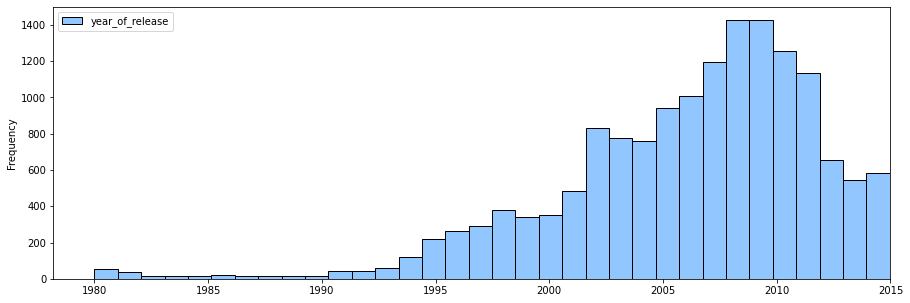

In [21]:
games[games['year_of_release'] <= 2016]['year_of_release'].plot(kind='hist',  bins=35, ec='black', figsize = (15,5), color='#92c6ff').legend()
plt.xlim(None, 2015)

In [22]:
games.year_of_release.value_counts().sort_index(ascending=False).head()

2016    502
2015    606
2014    581
2013    544
2012    653
Name: year_of_release, dtype: Int64

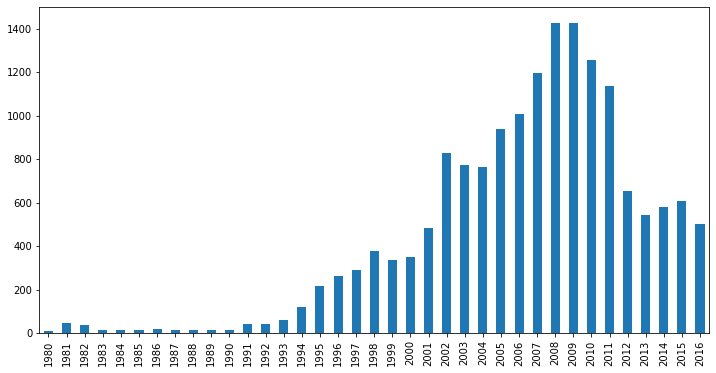

In [23]:
# КОД РЕВЬЮЕРА

games.year_of_release.value_counts().sort_index().plot.bar(figsize=(12,6));

ВЫВОД:
- на графике мы видим, что первые платформы появились 1980 году. с 1993 года начался активный рост, вплоть до 2010. После роста пошел спад, который возможно связан с развитием копьютерный и мобильных игр.

Изменение продаж по платформам

In [24]:
platform_sales = games.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'})
platform_sales.head()

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27

<AxesSubplot:xlabel='platform,year_of_release'>

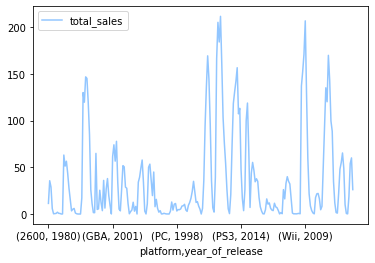

In [25]:
platform_sales.plot(color='#92c6ff')

Наблюдаем активный рост с 1993

In [26]:
def platform_sales(df):
    return (
        df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )
def platform_sales_plot(df):
    (
        df
            .plot(kind='barh', figsize=(10, 5), ec='black', color='#92c6ff')
            .set(xlabel='total_sales', ylabel='platform')
    )
    plt.show()

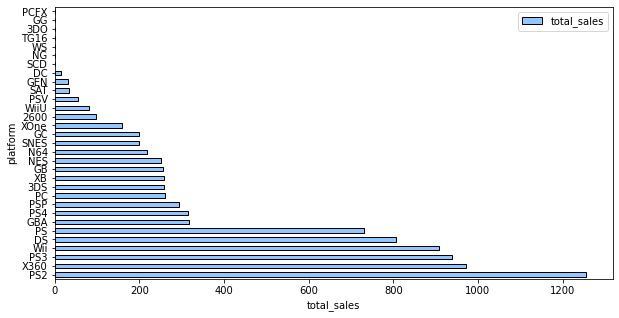

In [27]:
platform_sales_plot(platform_sales(games))

In [28]:
best_platform = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc']

In [29]:
games_platform_sales = pd.pivot_table(games, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(games_platform_sales.head())

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


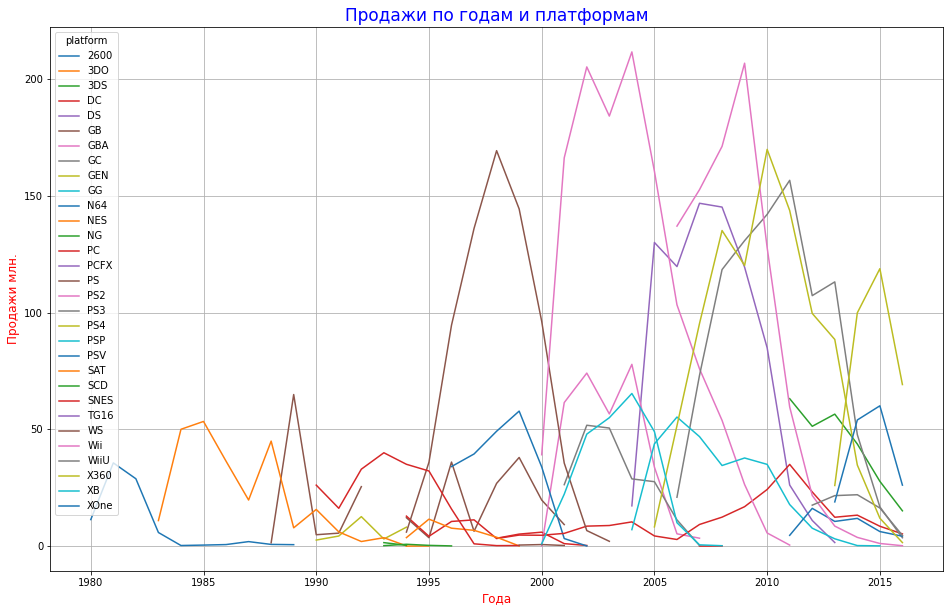

In [30]:
games_platform_sales.plot(figsize=(16,10))
plt.grid(True)
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Продажи млн.',fontsize=12, color='red')
plt.title('Продажи по годам и платформам', fontsize=17, color='blue')
plt.show()

Вывод:

Из графика мы видим, что актуальный период приблизительно 10 лет. За 10 лет появляются новые платформы, а старые уходят в небытие. Также каждая платформа в среднем живет 10 лет, следствием этого является то, что рынок постоянно модернезируется, появляется много новых платформ, старые просто уступают им.

Возьмем за актуальный период крайние 6 лет рассматриваемой выборки. Итак, актуальным периодом получаются 2010 - 2016 гг. Уменьшили период с 10 летнего до 6 летнего, чтобы рассмотреть последние поколения платформ.


In [31]:
current_period = (games['year_of_release'] > 2012) & (games['year_of_release'] <= 2016)
current_period = games.loc[current_period]

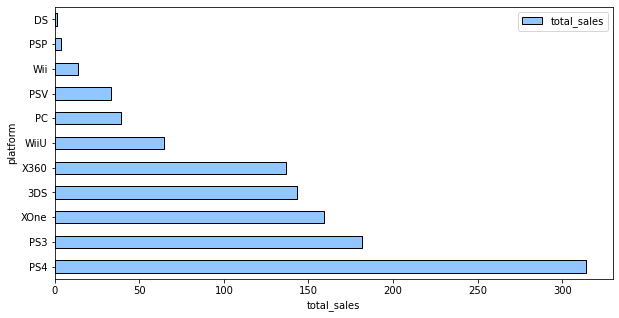

In [32]:
total_sales = platform_sales(current_period)
platform_sales_plot(total_sales)

In [33]:
best_platform_in_current_period = ['ps3', 'x360', 'ps4', '3ds', 'xone', 'pc']

Вывод:

По продажам за последние 6 лет лидируют: ps4, ps3, XOne, 3DS, x360.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Вывод:

Исходя из графиков видно, что большинство платформ испытывают спад.

Потенциально прибыльные платформы на 2017 год:

PS4
Xone

При этом количество выпускаемых игр падает

In [34]:
current_period.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').loc[[2015, 2016]]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 3.0)

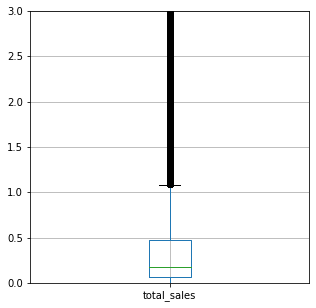

In [35]:
games.boxplot('total_sales', figsize=(5,5)).set_ylim(0, 3)

In [36]:
def total_sales_best_platform(name, df):
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

In [73]:
current_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,without_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,without_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,without_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,without_rating,0.01


<div style="border-radius: 15px; border: 3px solid black; padding: 15px; ">
<b> Комментарий ревьюера 2 </b>
    
А вот и причина: в таблице консоли прописаны заглавными буквами.


Однако нам все-таки лучше не несколько графиков рядом изобразить, а несколько боксов на одном графике. Делается это просто: </div>

(0.0, 3.0)

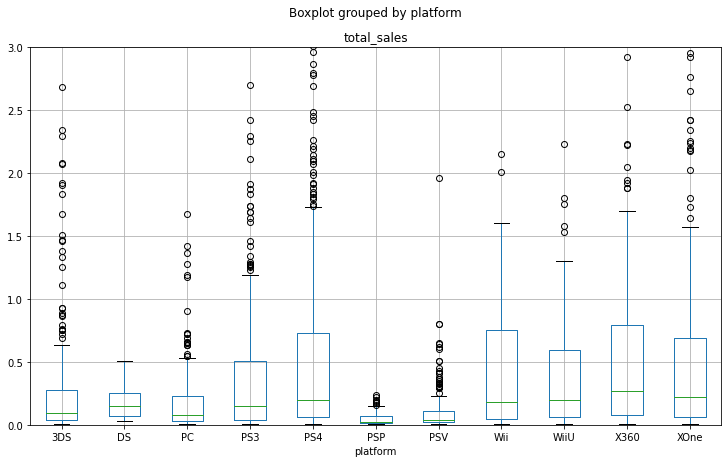

In [74]:
current_period.boxplot('total_sales', by='platform', figsize=(12,7))
plt.ylim(0,3)

ВЫВОД:
    
- Наиболее перспективными платформами за последние 6 лет можно назвать: x360, ps3 и ps4.
- Медиана по топовым платформам в промежетке 0.2-0.3 млн долларов прибыли за игру.
- Самая большая верхняя граница предела, за которыми уже определяются аномалии у платформы PS4, приблизительно 1.7 млн долларов

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Отзывы критиков

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

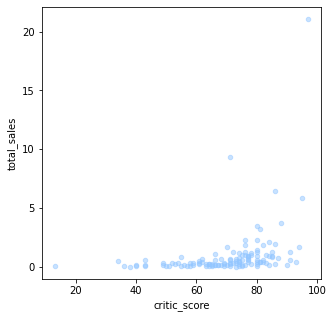

In [42]:
ps3 = current_period[(current_period['platform'] == 'PS3') & (current_period['critic_score'] >0)].copy()
ps3.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), color='#92c6ff', alpha=0.5)

Отзывы пользователей

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

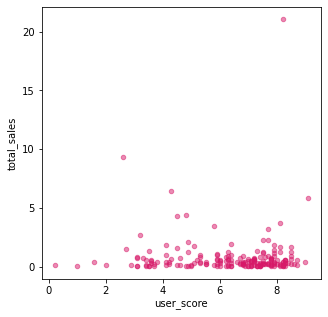

In [43]:
ps3_users = current_period[(current_period['platform'] == 'PS3') & (current_period['user_score'] >0)].copy()
ps3_users.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), color='#d71868', alpha=0.5)

In [44]:
current_period_ps3_users = ps3_users[['total_sales' ,'critic_score', 'user_score']]
current_period_ps3_users.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.333807,0.002394
critic_score,0.333807,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


- Отзывы пользователей не влияют на продажи
- Есть связь между отзывами критиков и продажами

матрица корреляции

In [75]:
current_period_ps3_users.critic_score.unique()

array([97., 71., 86., 95., nan, 88., 80., 81., 76., 84., 82., 94., 70.,
       72., 91., 85., 78., 74., 66., 83., 75., 77., 55., 87., 73., 43.,
       62., 68., 34., 61., 93., 69., 59., 52., 54., 49., 58., 64., 53.,
       63., 65., 67., 90., 40., 56., 36., 51., 57., 13., 50.])

выделим нужные данные

In [46]:
current_period_ps3_users_filtered = current_period_ps3_users[['total_sales' ,'critic_score', 'user_score']]

<AxesSubplot:>

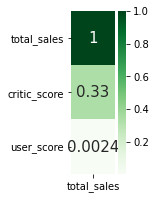

In [47]:
#данные по ps3
plt.figure(figsize=(1,3))
sns.heatmap(current_period_ps3_users_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

In [48]:
current_period_x360 = current_period[(current_period['platform'] == 'X360') & (current_period['user_score'] > 0)].copy()

In [49]:
current_period_x360_filtered = current_period_x360[['total_sales' ,'critic_score', 'user_score']]

<AxesSubplot:>

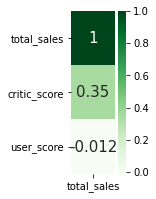

In [50]:
#данные по xbox360
plt.figure(figsize=(1,3))
sns.heatmap(current_period_x360_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

In [51]:
current_period_3ds = current_period[(current_period['platform'] == '3DS') & (current_period['user_score'] > 0)].copy()

In [52]:
current_period_3ds_filtered = current_period_3ds[['total_sales' ,'critic_score', 'user_score']]

<AxesSubplot:>

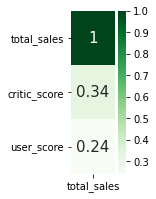

In [53]:
#данные по 3ds
plt.figure(figsize=(1,3))
sns.heatmap(current_period_3ds_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

Сильнее всего на стоимость влияет оценка критиков, оценка пользователей практически не влияет на стоимость

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [54]:
def genre_sales (df):
    return (
        df
            .pivot_table(index='genre', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )
def genre_sales_plot(df):
    (
        df
            .plot(kind='barh', figsize=(10, 5), ec='black', color='#d71868')
            .set(xlabel='total_sales', ylabel='genre')
    )
    plt.show()

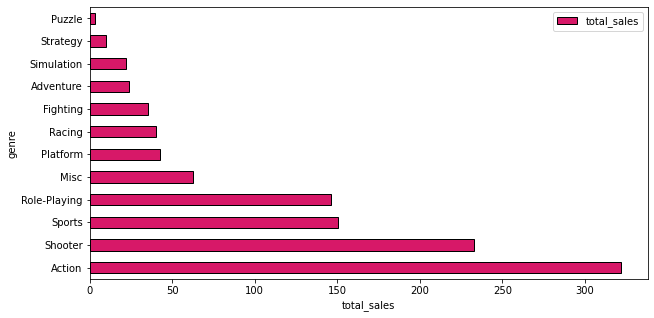

In [55]:
genre_sales_plot(genre_sales(current_period))

In [56]:
def genre_sales_mean (df):
    return (
        df
            .pivot_table(index='genre', values='total_sales', aggfunc='mean')
            .sort_values('total_sales', ascending=False)
    )
def genre_sales_plot_mean(df):
    (
        df
            .plot(kind='barh', figsize=(10, 5), ec='black', color='#d71868')
            .set(xlabel='total_sales', ylabel='genre')
    )
    plt.show()

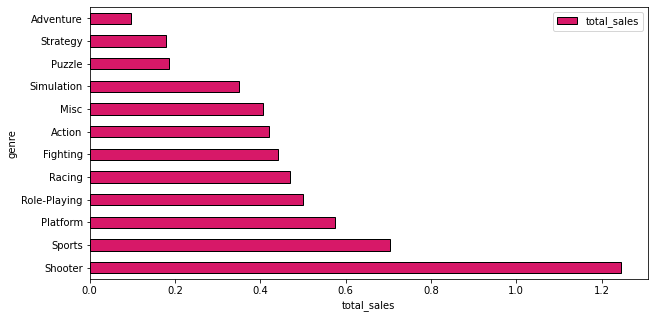

In [57]:
genre_sales_plot_mean(genre_sales_mean(current_period))

In [58]:
def genre_sales_median (df):
    return (
        df
            .pivot_table(index='genre', values='total_sales', aggfunc='median')
            .sort_values('total_sales', ascending=False)
    )
def genre_sales_plot_median(df):
    (
        df
            .plot(kind='barh', figsize=(10, 5), ec='black', color='#d71868')
            .set(xlabel='total_sales', ylabel='genre')
    )
    plt.show()

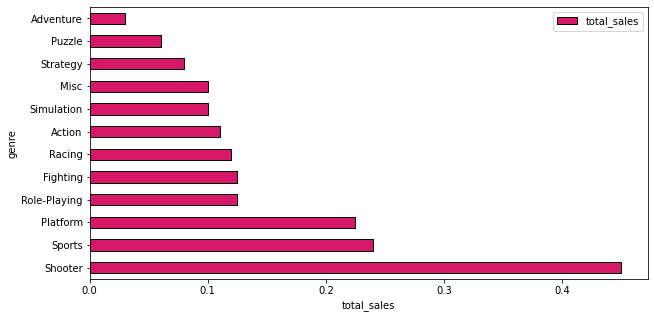

In [59]:
genre_sales_plot_median(genre_sales_median(current_period))

Наиболее популярные жанры action и shooter, наименее популярные puzzle и strategy (но также стоит учитывать, что на производство игр например в жанре action в среднем уходит значительно больше средств чем на произвоство игр например в жанре puzzle)
Если рассматривать среднее и медианное значение, то самые популярные жанры shooter и sports, а наименее популярный жанр adventure

# Шаг 4. Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Портрет пользователя NA (Северная Америка)

In [60]:
#выделим пропуски в рейтинге в категорию without_rating
current_period['rating'] = current_period['rating'].fillna('without_rating')

/tmp/ipykernel_78/3798544927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_period['rating'] = current_period['rating'].fillna('without_rating')


<AxesSubplot:xlabel='platform'>

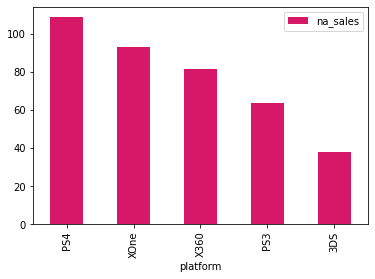

In [61]:
#Самые популярные платформы (топ-5) в регионе NA
current_period.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='#d71868')

<AxesSubplot:xlabel='genre'>

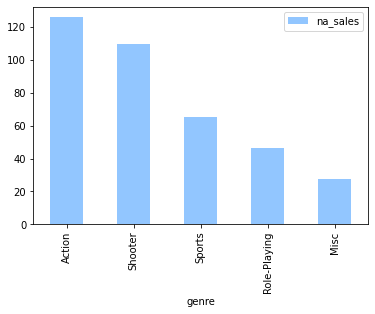

In [62]:
#Самые популярные жанры (топ-5) в регионе NA
current_period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='#92c6ff')

<AxesSubplot:xlabel='rating'>

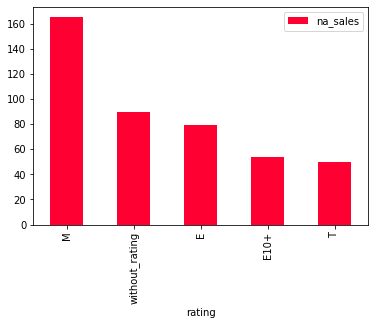

In [63]:
#Влияние рейтинга ESRB на продажи в регионе NA
current_period.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='#ff0033')

Вывод
У жителей Северной Америки:

- наиболее популярны платформы: ps4, XOne, x360, ps3 и 3ds.
- жанры: action, shooter, sports, role-playing и misc
- большая часть выручки идет от игр с рейтингом m и e, и игр без рейтинга

Портрет пользователя EU (Европа)

<AxesSubplot:xlabel='platform'>

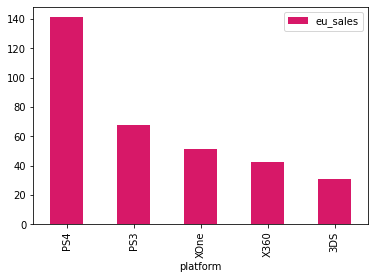

In [64]:
#Самые популярные платформы (топ-5) в регионе EU
current_period.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color='#d71868')

<AxesSubplot:xlabel='genre'>

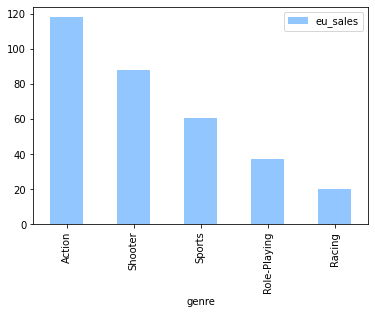

In [65]:
#Самые популярные жанры (топ-5) в регионе EU
current_period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', color='#92c6ff')

<AxesSubplot:xlabel='rating'>

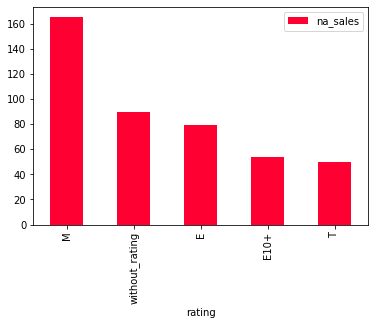

In [66]:
#Влияние рейтинга ESRB на продажи в регионе EU
current_period.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', color='#ff0033')

Вывод
- Жителям Европы нравятся следующие платформы: ps4, ps3, XOne, x360 и 3DS.
- action, shooter, sports, role-playing и racing - самые популярные жанры
- большая часть выручки идет от игр с рейтингом m, e. и игр без рейтинга 

Портрет пользователя JP (Япония)

<AxesSubplot:xlabel='platform'>

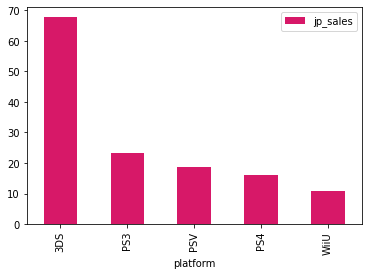

In [67]:
#Самые популярные платформы (топ-5) в регионе JP
current_period.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='#d71868')

<AxesSubplot:xlabel='genre'>

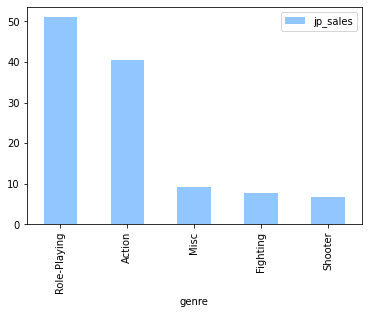

In [68]:
#Самые популярные жанры (топ-5) в регионе JP
current_period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='#92c6ff')

<AxesSubplot:xlabel='rating'>

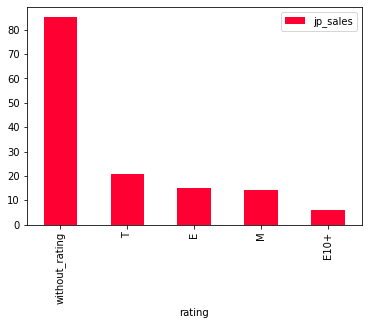

In [69]:
#Влияние рейтинга ESRB на продажи в регионе JP
current_period.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', color='#ff0033')

Вывод
- Жителям Японии нравятся следующие платформы: самая популярная в этом регионе - 3ds, далее с большим отрывом ps3, ps5, ps4, WIIU.
- В самом топе наиболее популярных жанров: role-playing, action, далее с большим отрывом: misc, fighting, shooter.
- Большую часть продаж с большим отрывом приносят игру у которых отсутсвуеи рейтинг, далее идут игры с рейтингом  t, e, m.

Общий вывод:
    
В Северной Америки и Европе портреты пользователей похожи почти по всем параметрам. Например совпадение есть  по наиболее популярным жанрам - action и shooter. И наблюдаем полное совпадение по рейтингам. Зато у жителей Японии предпочтения отличаются, у них наиболее популярна платформа 3ds, а также игры с жанром - role-playing. А популярнее всего игры без рейтинг и с рейтингом  t,e,m. 

Такое отличие Японии может быть связанно с тем, что японцы реже сидят дома и поэтому чаще пользуются портативными платформами.
Ну а по скольку японцы известны своей любовью аниме и персонажам оттуда не удивительно, что самые популярный жанр у них 
role-playing

# Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [70]:
current_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,without_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,without_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Проверяем гипотезу №1
Получается гипотеза о равенстве средних двух генеральных совокупностей.

- Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC различаются.


In [71]:
xbox_one_ratings = current_period[(current_period['platform'] == 'XOne') & (current_period['user_score'] > -1)]['user_score']
pc_ratings = current_period[(current_period['platform'] == 'PC') & (current_period['user_score'] > -1)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)
alpha = 0.05
results = st.ttest_ind(xbox_one_ratings, pc_ratings)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

# Проверяем гипотезу №2

- Н0 (нулевая гипотеза) - cредние пользовательские рейтинги жанров Action и Sports одинаковые.
- H1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports различаются.


In [72]:
action_ratings = current_period[(current_period['genre'] == 'Action') & (current_period['user_score'] > -1)]['user_score']
pc_ratings = current_period[(current_period['genre'] == 'Sports') & (current_period['user_score'] > -1)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings)
alpha = 0.05
results = st.ttest_ind(action_ratings, pc_ratings)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


Таким образом, верное утверждение, что средние пользовательские рейтинги жанров Action и Sports различаются.

# Шаг 6. Общий вывод
Исходя из анализа предлагаемой выборки, можно сделать следующие выводы:

1. Рынок консолей находится в упадки в связи с активной конкуренцией игр на пк и мобильных игр
2. В среднем "жизнь" игровой платформы длится около 10 лет
3. По продажам за последние 6 лет лидируют: ps4, ps3 и XOne.
4. Наблюдается взаимосвязь между отзывами критиков и пользователей
5. Отзывы пользователей не влияют на продажи
6. Отзывы критиков влияют на продажи.
7. Наиболее популярные жанры с самыми прибыльными продажами - action и shooters.
8. В Америке и Европе лучше всего продаются ps4 и XOne, а также игры с жанрами action и shooters с рейтингом M.
9. В Японии иная ситуация: популярностью пользуются ролевый видеоигры, и платформа - 3ds 
10. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
11. Средние пользовательские рейтинги жанров Action и Sports различаются.

# Рекомендации:

1. Возможно платформам с видеоиграми стоит обратить свое внимание на компьютерные игры ( в нынешнее время в моду входит кроссплатформа ( где пользователи с приставос и с пк могут играть вместе))
2. Консолям следует сделать больший упор на сюжете, поскольку тягаться с пк в качестве графики и количестве кадров не выйдет, а также сделать упор на файтинги, гонки и спортивные симуляторы, поскольку в них удобнее играть на консоли
3. Разобраться с пропусками, которые возникли в оценках пользователей критиков и пользователей, а также с пропусками в графе "рейтинг".